In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.font_manager as fm

In [3]:
import os
if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
# 마이너스 폰트 꺠지는 문제에 대한 대처
plt.rc('axes', unicode_minus = False)    

* 데이터 분석을 위해서는 `문제를 잘 찾아서` 가설을 세워야 한다
* 따라서 문제를 찾는 능력이 중요!

# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리 둘레의 크기는 체중과 상관관계가 있 을까?
* 분석을 통해 `가설을 검증`

# 데이터 불러오기

In [4]:
df = pd.read_csv("C:/Users/82109/data_setting/data/NHIS_OPEN_GJ_2017.CSV",encoding ='cp949')

In [5]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


# 기본정보 보기

In [6]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

# 결측치 보기

In [7]:
# 컬람의 수 정리가 필요해!
null_count = df.isna().sum()
null_count

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<AxesSubplot:>

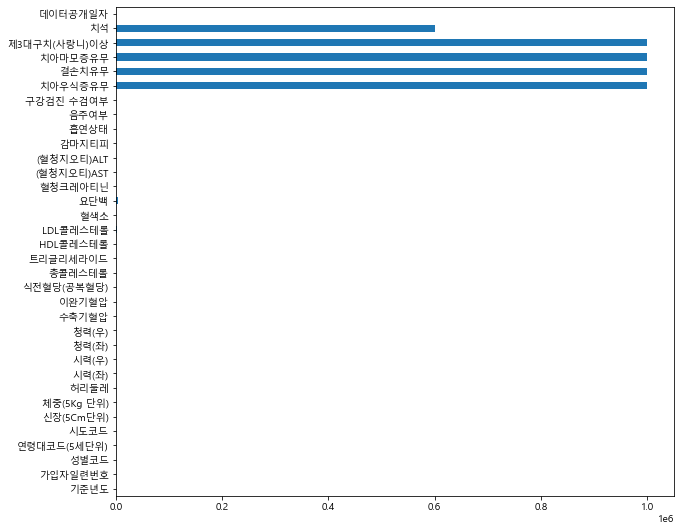

In [8]:
null_count.plot.barh(figsize=(10,9))

# 데이터 요약하기

In [9]:
df['성별코드'].value_counts()

1    531172
2    468828
Name: 성별코드, dtype: int64

In [10]:
df['흡연상태'].value_counts()

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

# groupby와 pivot_table 사용하기

## groupby
* 시리즈 형태로 결과 출력

In [11]:
# 두 개 이상의 columns 값을 분석하고 싶다할 때 이용
# groupby로 데이터를 그룹화 합니다.
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [12]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(['성별코드','음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [13]:
# 감마지티피는 간수치와 음주여부의 상관관계가 딱보이는구만!
df.groupby(['성별코드','음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [14]:
df.groupby(['성별코드','음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

## pivot_table
* dataframe 형태로 프린트

In [15]:
df.pivot_table(index = '음주여부', values = '가입자일련번호', aggfunc = 'count')

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [16]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(df,index = '음주여부', values = '감마지티피',aggfunc = ['mean','median'])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [17]:
pd.pivot_table(df,index = ['성별코드','음주여부'], values = '감마지티피',aggfunc = ['describe'])

describe                                                        
               25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                                 
1    0.0      18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0      24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0      13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0      13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

# 전체 데이터 시각화하기

## 히스토그램

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'성별코드'}>,
        <AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'시도코드'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg 단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>,
        <AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>],
       [<AxesSubplot:title={'center':'수축기혈압'}>,
        <AxesSubplot:title={'center':'이완기혈압'}>,
        <AxesSubplot:title={'center':'식전혈당(공복혈당)'}>,
        <AxesSubplot:title={'center':'총콜레스테롤'}>,
        <AxesSubplot:title={'center':'트리글리세라이드'}>,
        <AxesSubplot:title={'center':'HDL콜레스테롤'}>],
       [<AxesSubplot:title={'center':'LDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'혈색소'}>,
        <Ax

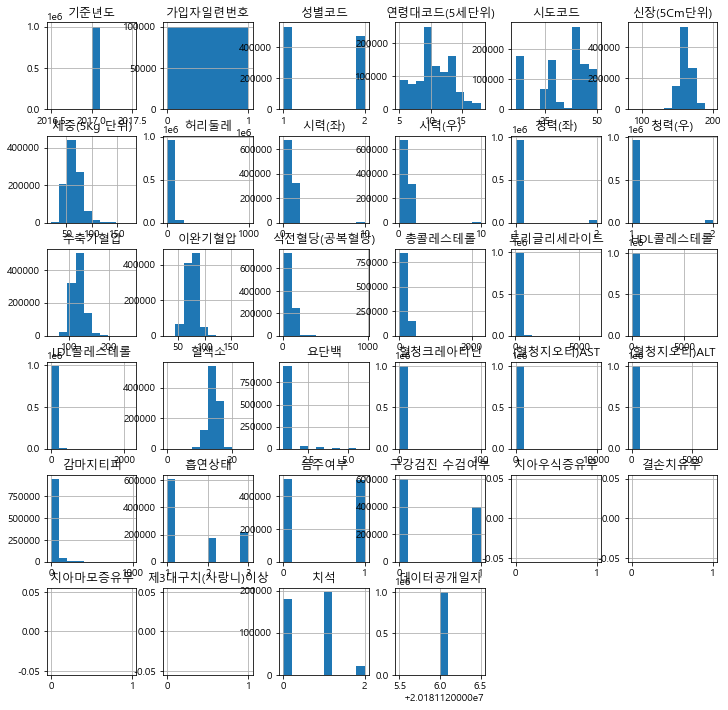

In [18]:
df.hist(figsize =(12,12))

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'성별코드'}>],
       [<AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'시도코드'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg 단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>],
       [<AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>]], dtype=object)

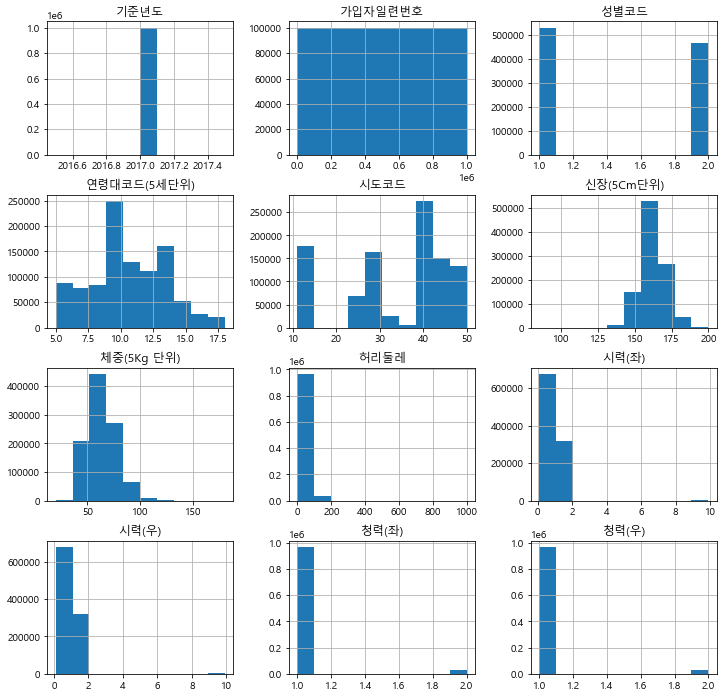

In [19]:
h = df.iloc[:,:12].hist(figsize=(12,12))
h

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'성별코드'}>,
        <AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'시도코드'}>],
       [<AxesSubplot:title={'center':'신장(5Cm단위)'}>,
        <AxesSubplot:title={'center':'체중(5Kg 단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>,
        <AxesSubplot:title={'center':'시력(우)'}>],
       [<AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>,
        <AxesSubplot:title={'center':'수축기혈압'}>,
        <AxesSubplot:title={'center':'이완기혈압'}>,
        <AxesSubplot:title={'center':'식전혈당(공복혈당)'}>],
       [<AxesSubplot:title={'center':'총콜레스테롤'}>,
        <AxesSubplot:title={'center':'트리글리세라이드'}>,
        <AxesSubplot:title={'center':'HDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'LDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'혈색소'}>],
       [<A

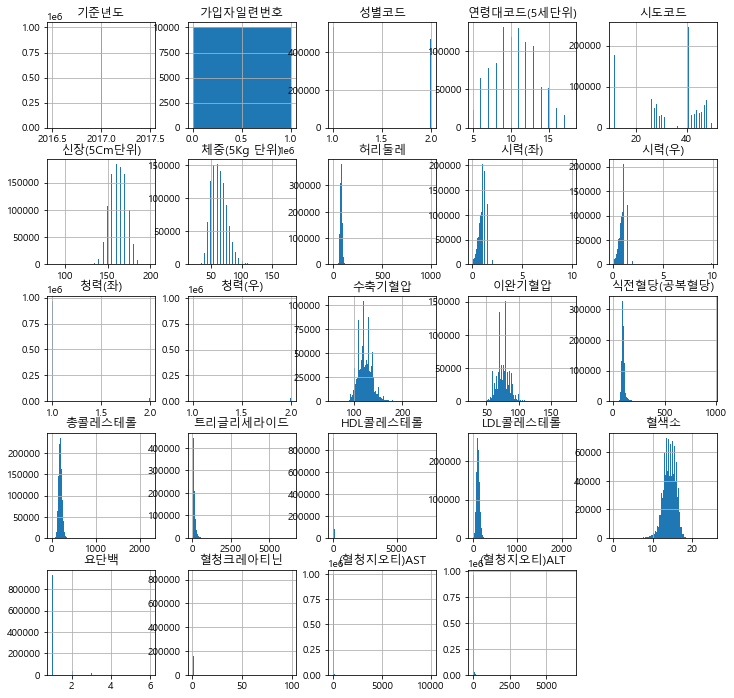

In [20]:
h = df.iloc[:,:24].hist(figsize=(12,12),bins =100)
h

array([[<AxesSubplot:title={'center':'감마지티피'}>,
        <AxesSubplot:title={'center':'흡연상태'}>,
        <AxesSubplot:title={'center':'음주여부'}>],
       [<AxesSubplot:title={'center':'구강검진 수검여부'}>,
        <AxesSubplot:title={'center':'치아우식증유무'}>,
        <AxesSubplot:title={'center':'결손치유무'}>],
       [<AxesSubplot:title={'center':'치아마모증유무'}>,
        <AxesSubplot:title={'center':'제3대구치(사랑니)이상'}>,
        <AxesSubplot:title={'center':'치석'}>],
       [<AxesSubplot:title={'center':'데이터공개일자'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

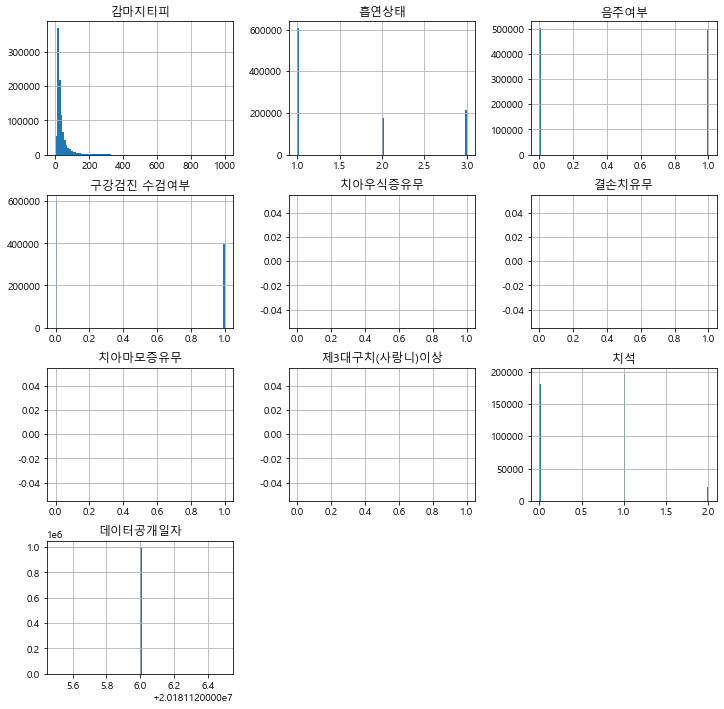

In [21]:
h = df.iloc[:,24:].hist(figsize=(12,12),bins =100)
h

In [22]:
df_sample = df.sample(1000, random_state = 1)
df_sample.shape

(1000, 34)

# 범주형(카테고리) 데이터시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.

* value_counts로 구한 값을 시각화 한다고 보면 된다

<AxesSubplot:xlabel='음주여부', ylabel='count'>

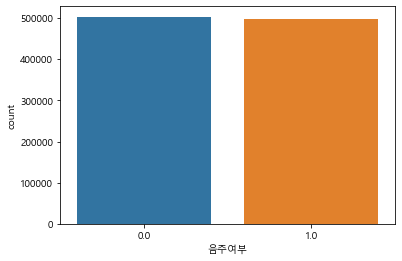

In [23]:
#음주여부에 따른 countplot을 그립니다.
sns.countplot(x='음주여부',data = df)

## hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

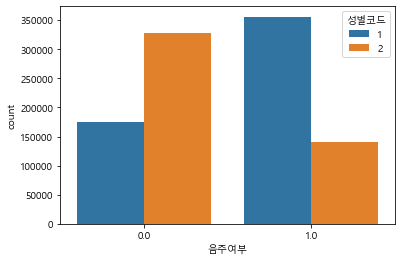

In [24]:
sns.countplot(x='음주여부',data = df, hue = '성별코드')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

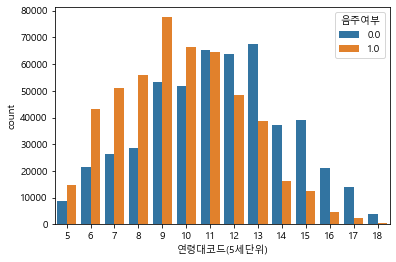

In [25]:
# countplot으로 연령대별 음주여부를 봅니다.
# hue를 사용해 서로 다른 색상으로 표현합니다.
sns.countplot(data=df, x='연령대코드(5세단위)', hue= '음주여부')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

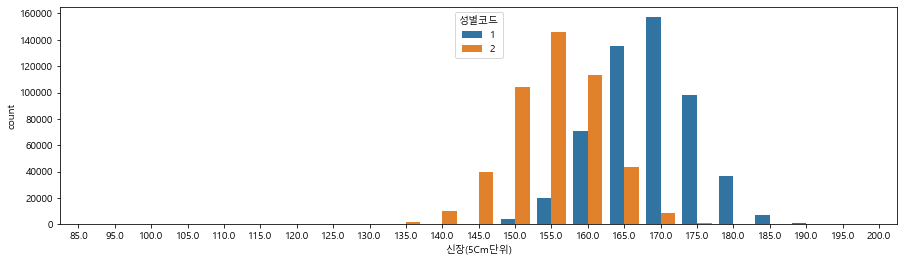

In [26]:
plt.figure(figsize=(15,4))
sns.countplot(x='신장(5Cm단위)',data =df, hue = '성별코드')

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

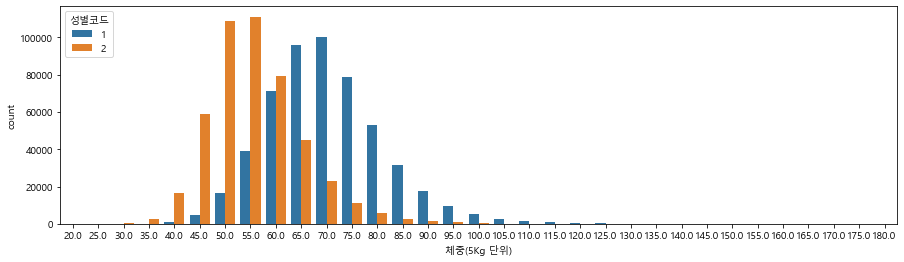

In [27]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='체중(5Kg 단위)', hue = '성별코드')

## barplot - 수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

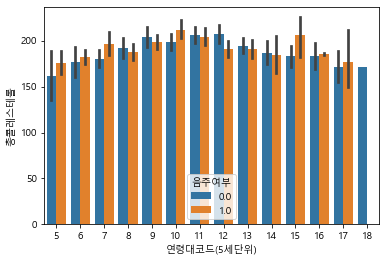

In [28]:
sns.barplot(data=df_sample, x='연령대코드(5세단위)',y='총콜레스테롤',hue = '음주여부')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

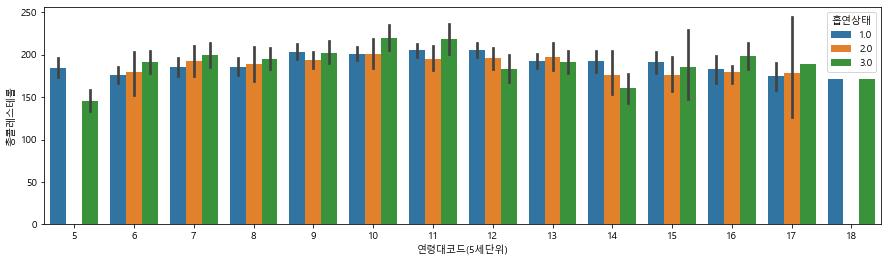

In [29]:
plt.figure(figsize = (15,4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)',y='총콜레스테롤',hue = '흡연상태')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

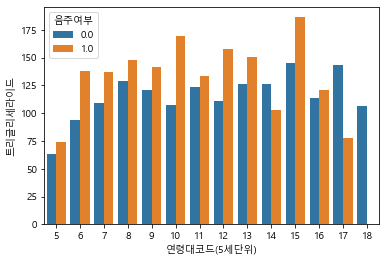

In [30]:
sns.barplot(data=df_sample, x='연령대코드(5세단위)',y='트리글리세라이드',hue = '음주여부',ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

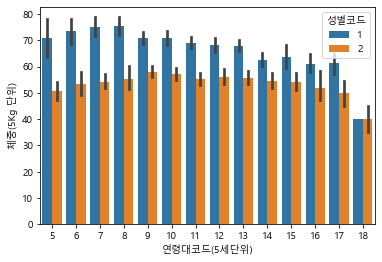

In [31]:
sns.barplot(data=df_sample, x='연령대코드(5세단위)',y='체중(5Kg 단위)',hue = '성별코드')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

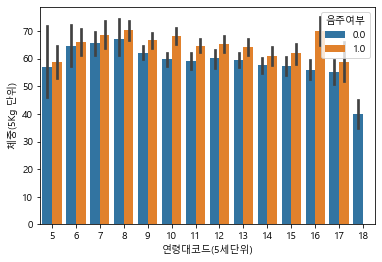

In [32]:
sns.barplot(data=df_sample, x='연령대코드(5세단위)',y='체중(5Kg 단위)',hue = '음주여부')

## lineplot and pointplot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

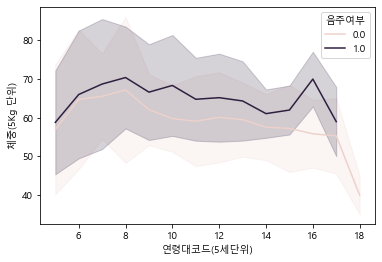

In [33]:
sns.lineplot(data=df_sample, x='연령대코드(5세단위)',y='체중(5Kg 단위)',hue = '음주여부',ci = 'sd')

## boxplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

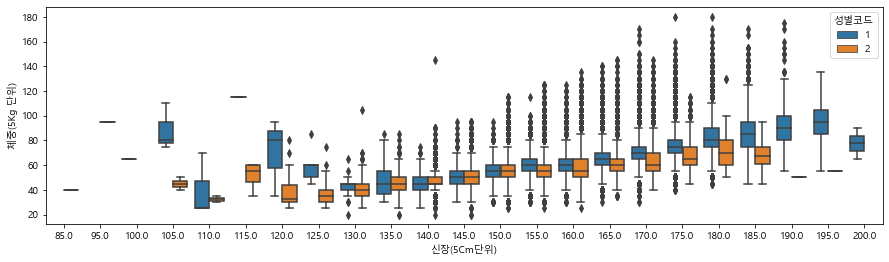

In [34]:
plt.figure(figsize = (15,4))
sns.boxplot(data=df, x='신장(5Cm단위)',y='체중(5Kg 단위)', hue = '성별코드')

## violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

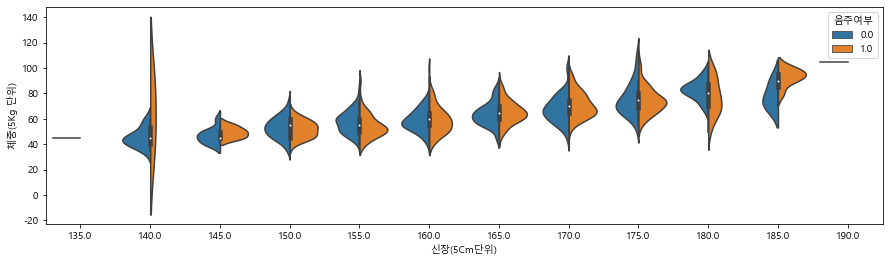

In [35]:
plt.figure(figsize = (15,4))
sns.violinplot(data=df_sample, x='신장(5Cm단위)',y='체중(5Kg 단위)', hue = '음주여부',split = True)

## swarm plot

C:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

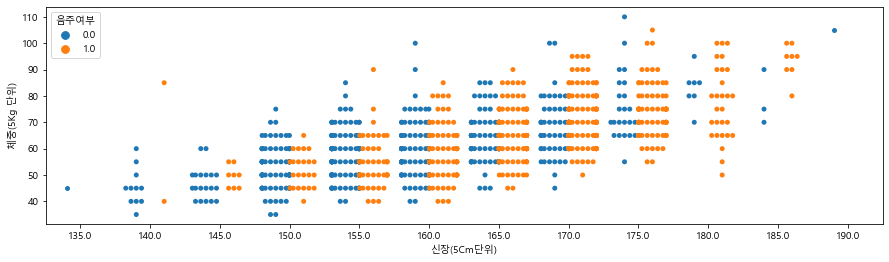

In [36]:
plt.figure(figsize = (15,4))
sns.swarmplot(data=df_sample, x='신장(5Cm단위)',y='체중(5Kg 단위)', hue = '음주여부',split = True)

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

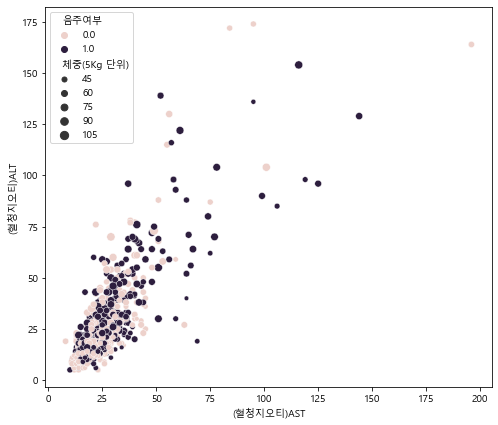

In [37]:
plt.figure(figsize = (8,7))
sns.scatterplot(data = df_sample, x = '(혈청지오티)AST',y='(혈청지오티)ALT',hue = '음주여부',
                   size = '체중(5Kg 단위)')

# 수치형 데이터 시각화

## lmplot
* lmplot의 col 기능을 통해 음주여부에 따라 서브플롯을 그릴 수 있다

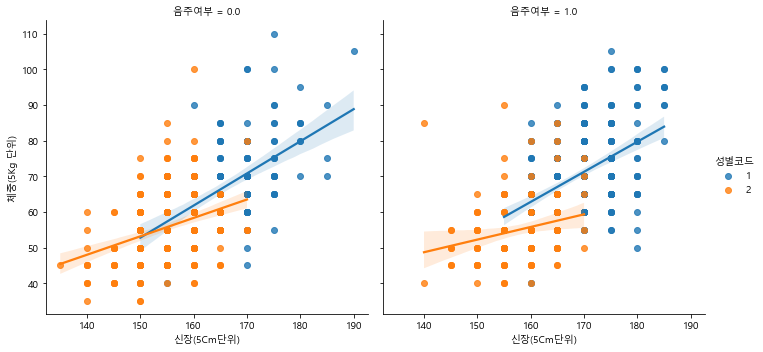

In [38]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)',y='체중(5Kg 단위)', hue = '성별코드',col = '음주여부')

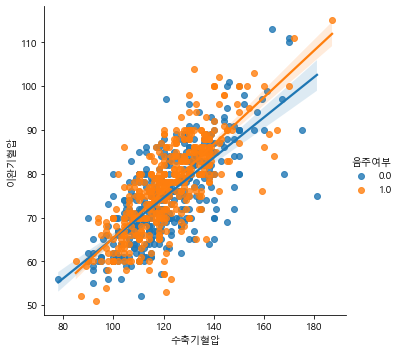

In [39]:
sns.lmplot(data=df_sample, x='수축기혈압', y='이완기혈압', hue = '음주여부')

## 이상치 다루기

<Figure size 576x504 with 0 Axes>

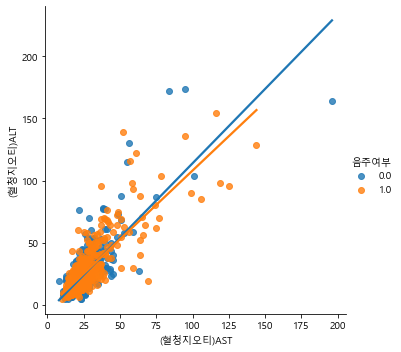

In [40]:
plt.figure(figsize = (8,7))
sns.lmplot(data = df_sample, x = '(혈청지오티)AST',y='(혈청지오티)ALT',hue = '음주여부'
            ,ci = None)

In [41]:
# AST와 ALT의 값이 400이하인거산 따로 데이터프레임으로 추출하기
df_ASLT = df_sample[(df_sample['(혈청지오티)AST']<400)&(df_sample['(혈청지오티)ALT']<400)] 

<Figure size 576x504 with 0 Axes>

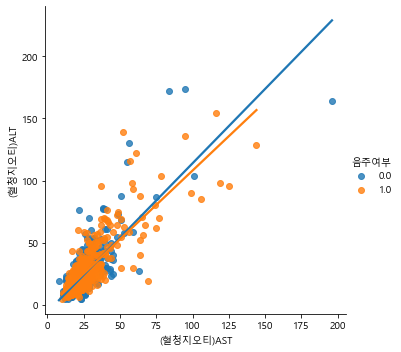

In [42]:
 plt.figure(figsize = (8,7))
sns.lmplot(data = df_ASLT, x = '(혈청지오티)AST',y='(혈청지오티)ALT',hue = '음주여부'
            ,ci = None)

In [43]:
df_ASLT_high = df[(df['(혈청지오티)AST']>400)&(df['(혈청지오티)ALT']>400)] 

<Figure size 576x504 with 0 Axes>

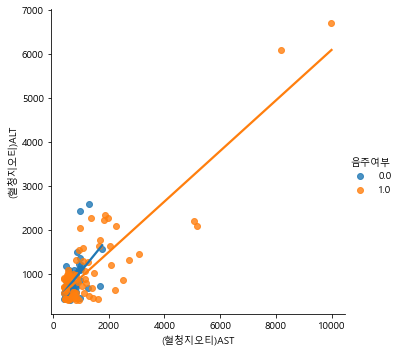

In [44]:
 plt.figure(figsize = (8,7))
sns.lmplot(data = df_ASLT_high, x = '(혈청지오티)AST',y='(혈청지오티)ALT',hue = '음주여부'
            ,ci = None)

In [45]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high['(혈청지오티)AST'] > 8000]
df_ASLT_high_8000.iloc[:,10:27]

,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
677177,2.0,2.0,100.0,60.0,107.0,129.0,152.0,30.0,69.0,13.0,1.0,1.2,8200.0,6080.0,888.0,1.0,1.0
887237,1.0,1.0,97.0,71.0,86.0,158.0,111.0,100.0,35.0,17.8,3.0,0.8,9999.0,6710.0,379.0,3.0,1.0


## displot

In [46]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [49]:
df_chol = df.loc[df['총콜레스테롤'].notna(),'총콜레스테롤']
df_chol.head()

0    178.0
1    255.0
2    211.0
3    160.0
4    253.0
Name: 총콜레스테롤, dtype: float64

C:\Users\82109\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

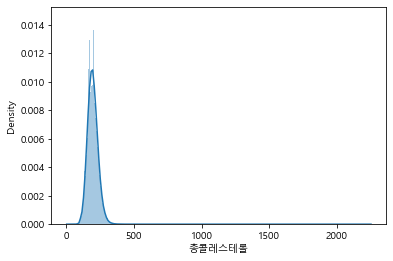

In [50]:
sns.distplot(df_chol,bins=1000)

C:\Users\82109\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

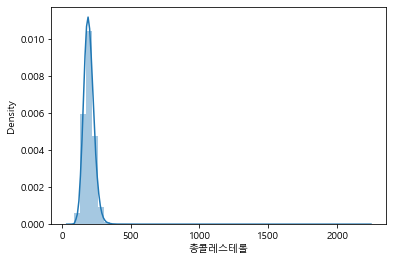

In [52]:
#음주여부가 1인 값에대한 '총콜레스테롤'을 구합니다
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부']==1),'총콜레스테롤'])

# 상관관계 분석하기

In [58]:
columns = ['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자']

In [62]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
기준년도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가입자일련번호,NaN,1.000000,0.003616,0.025763,0.010541,-0.018854,-0.000301,0.023353,-0.005789,-0.085230,...,-0.004485,0.007783,-0.008607,-0.002925,NaN,NaN,NaN,NaN,0.086952,NaN
성별코드,NaN,0.003616,1.000000,0.076229,-0.105727,-0.704533,-0.568353,-0.411101,-0.093277,-0.115567,...,-0.314341,-0.604199,-0.350001,-0.034273,NaN,NaN,NaN,NaN,-0.040708,NaN
연령대코드(5세단위),NaN,0.025763,0.076229,1.000000,0.004419,-0.397412,-0.210610,0.134720,-0.201947,-0.203802,...,0.052946,-0.136350,-0.277149,-0.163621,NaN,NaN,NaN,NaN,-0.049469,NaN
시도코드,NaN,0.010541,-0.105727,0.004419,1.000000,0.032370,0.059043,0.052206,0.026075,0.078865,...,0.016472,0.068355,-0.006645,-0.067504,NaN,NaN,NaN,NaN,-0.060941,NaN
신장(5Cm단위),NaN,-0.018854,-0.704533,-0.397412,0.032370,1.000000,0.648489,0.293774,0.141800,0.156605,...,0.171372,0.505945,0.362905,0.044713,NaN,NaN,NaN,NaN,-0.002983,NaN
체중(5Kg 단위),NaN,-0.000301,-0.568353,-0.210610,0.059043,0.648489,1.000000,0.790520,0.076534,0.133502,...,0.254150,0.397230,0.235974,0.038636,NaN,NaN,NaN,NaN,0.067802,NaN
허리둘레,NaN,0.023353,-0.411101,0.134720,0.052206,0.293774,0.790520,1.000000,-0.033007,0.034518,...,0.271566,0.268685,0.084514,-0.019009,NaN,NaN,NaN,NaN,0.033407,NaN
시력(좌),NaN,-0.005789,-0.093277,-0.201947,0.026075,0.141800,0.076534,-0.033007,1.000000,0.462877,...,0.011519,0.063964,0.073696,0.020214,NaN,NaN,NaN,NaN,0.060768,NaN
시력(우),NaN,-0.085230,-0.115567,-0.203802,0.078865,0.156605,0.133502,0.034518,0.462877,1.000000,...,0.045560,0.054681,0.063220,0.017297,NaN,NaN,NaN,NaN,-0.010951,NaN


In [69]:
df_corr.loc[df_corr['신장(5Cm단위)']> 0.3,'신장(5Cm단위)']

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.648489
혈색소           0.529475
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [74]:
df_corr.loc[df_corr['음주여부']> 0.25,'음주여부']

신장(5Cm단위)    0.362905
혈색소          0.291863
감마지티피        0.250011
흡연상태         0.365642
음주여부         1.000000
Name: 음주여부, dtype: float64

## heatmap

<AxesSubplot:>

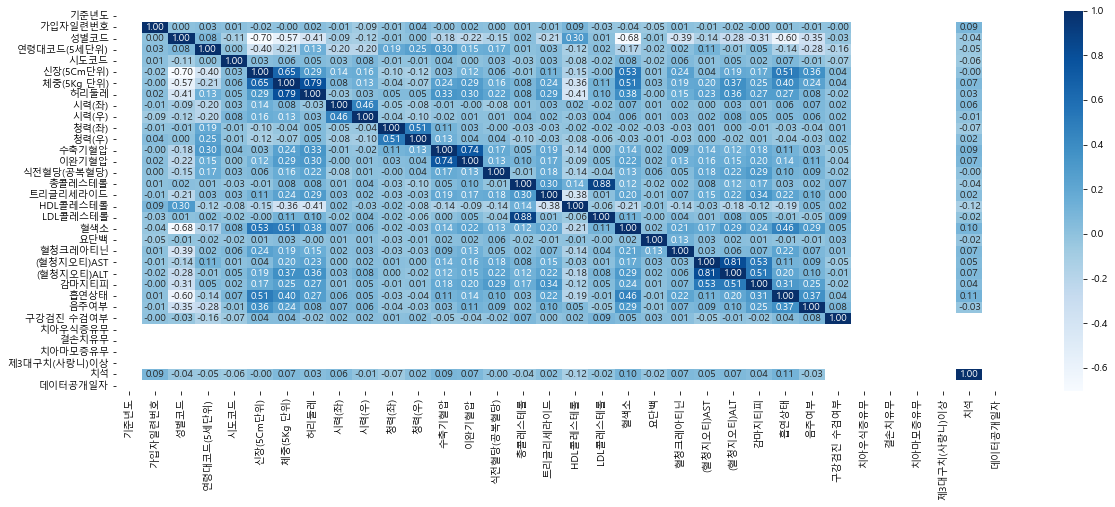

In [76]:
plt.figure(figsize = (20,7))
sns.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'Blues')

In [ ]:
# 히트맵을 보니 신장과 허리 둘레의 크기는 0.29의 약한 상관관곙